<a href="https://colab.research.google.com/github/StevenLomon/face-recognition-project/blob/Bashir/face_recognition_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import imghdr
from imutils import paths
from matplotlib import pyplot as plt

# image preprocessing

In [115]:
import shutil

data = pd.read_csv('fairface.csv')

main_directory = '/Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images (kopia)'
structured_directory = '/Users/yari/2023/Applicerad_AI/fairfacedata/structured_images'

for index, row in data.iterrows():
    source = os.path.join(main_directory, row['file'])
    race_dir = os.path.join(structured_directory, row['race'])
    if not os.path.exists(race_dir):
        os.makedirs(race_dir)
    destination = os.path.join(race_dir, row['file'])
    if os.path.exists(source):
        shutil.move(source, destination)
    else:
        print(f'file could not be found and skipped: {source}')

file could not be found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images (kopia)/1.jpg
file could not be found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images (kopia)/10.jpg
file could not be found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images (kopia)/100.jpg
file could not be found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images (kopia)/1000.jpg
file could not be found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images (kopia)/10004.jpg
file could not be found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images (kopia)/10005.jpg
file could not be found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images (kopia)/10006.jpg
file could not be found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_images (kopia)/10008.jpg
file could not be found and skipped: /Users/yari/2023/Applicerad_AI/fairfacedata/fairface_

In [116]:
data.head()

file    age  gender            race phototype
0      1.jpg  50-59    Male      East Asian       III
1     10.jpg  30-39    Male  Middle Eastern         V
2    100.jpg  20-29  Female      East Asian       III
3   1000.jpg  30-39    Male           White    I & II
4  10004.jpg  40-49    Male          Indian         V

In [148]:
images = tf.keras.utils.image_dataset_from_directory('/Users/yari/2023/Applicerad_AI/fairfacedata/structured_images')

Found 35424 files belonging to 7 classes.


In [55]:
image_iterator = images.as_numpy_iterator()

In [122]:

batch = image_iterator.next()

In [108]:
#images represented as numpy array
batch[0].shape

(32, 256, 256, 3)

In [86]:
batch[1] # this is the clauses i vår fall label for olika ras. 

array([1, 6, 1, 5, 0, 2, 1, 0, 6, 6, 6, 1, 3, 0, 6, 1, 0, 5, 5, 4, 3, 3,
       3, 4, 3, 6, 6, 6, 1, 2, 5, 1], dtype=int32)

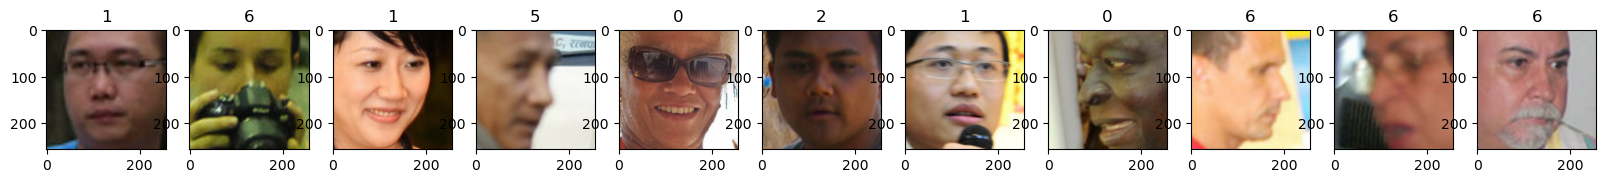

In [103]:
fig, ax = plt.subplots(ncols=11, figsize = (20,20))
for idx, img in enumerate(batch[0][:11]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [149]:
# ska skala ner datan
scaled_images = images.map(lambda x, y: (x/255, y))

In [150]:
scaled_image_iterator = scaled_images.as_numpy_iterator()

In [151]:
batch = scaled_image_iterator.next()

In [152]:
batch[0].min()

0.0

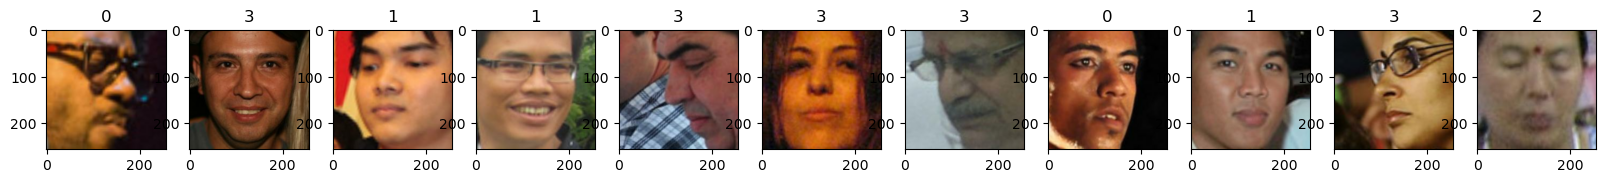

In [155]:
fig, ax = plt.subplots(ncols=11, figsize = (20,20))
for idx, img in enumerate(batch[0][:11]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# spliting data

In [156]:
len(images)

1107

In [157]:
train_size = int(len(images)*.7)
validate_size = int(len(images)*.2)
test_size = int(len(images)*.1)

In [161]:
print(f'Train size: {train_size} \nTest size: {test_size} \nValidation size: {validate_size}')

Train size: 774 
Test size: 110 
Validation size: 221


In [163]:
train = images.take(train_size)
test = images.skip(train_size).take(test_size)
validate = images.skip(train_size+test_size).take(validate_size)

# Modeling

In [170]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense , Flatten, Dropout

In [171]:
model = Sequential()

In [172]:
# adding convolotional layer
model.add(Conv2D(16, (3,3),1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [176]:
import tensorflow as tf
model.compile('adam', loss= tf._losses.BinaryCrossentropy(), metrics=['accurecy'])

In [177]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0